In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud #For Text Visualize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.metrics import RocCurveDisplay,classification_report,roc_curve,auc
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("E:\\DATASETS\\emails.csv")

In [3]:
data=df.copy()
data1=df.copy()

In [4]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
data.sample(5)

,text,spam
1229,Subject: information request received we are ...,1
562,Subject: is this sto - ck ready to blaze highe...,1
5412,"Subject: re : calpx prices jason , i think w...",0
5556,Subject: re : i ' ll be gone for a month sofy...,0
1257,Subject: the best investments otc newsletter...,1


In [6]:
data.shape

(5728, 2)

In [7]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [9]:
data["text"][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

spam
0    4360
1    1368
Name: count, dtype: int64

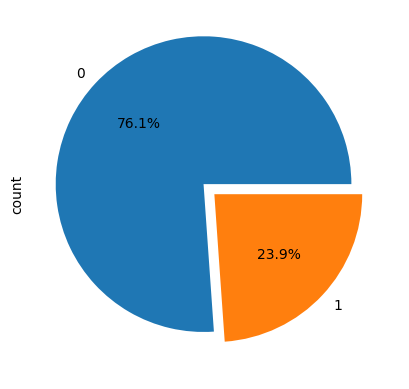

In [10]:
data["spam"].value_counts().plot(kind="pie",
            labels=data["spam"].value_counts().index,autopct="%1.1f%%",explode=[0.1,0])
data["spam"].value_counts()

**Create Word Clouds**

In [11]:
def plot_word_cloud(text,title):
    wordcloud=WordCloud(width=800,height=400,background_color="white").generate(text)
    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
real_text=" ".join(data[data["spam"]==0]["text"])
fake_text=" ".join(data[data["spam"]==1]["text"])

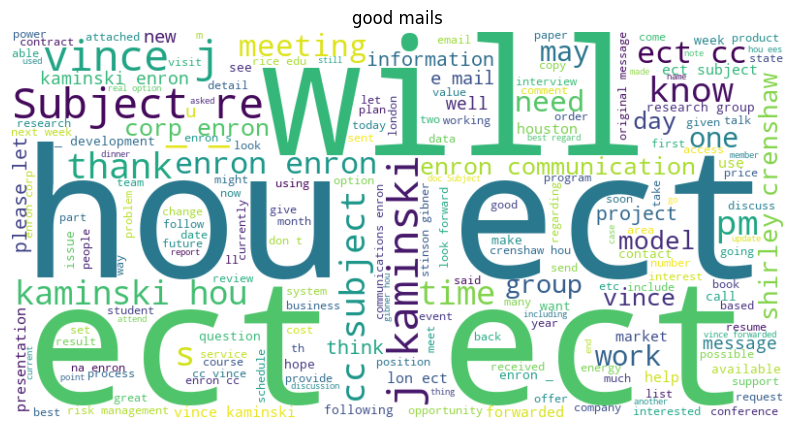

In [12]:
plot_word_cloud(real_text,"good mails")
plt.show()

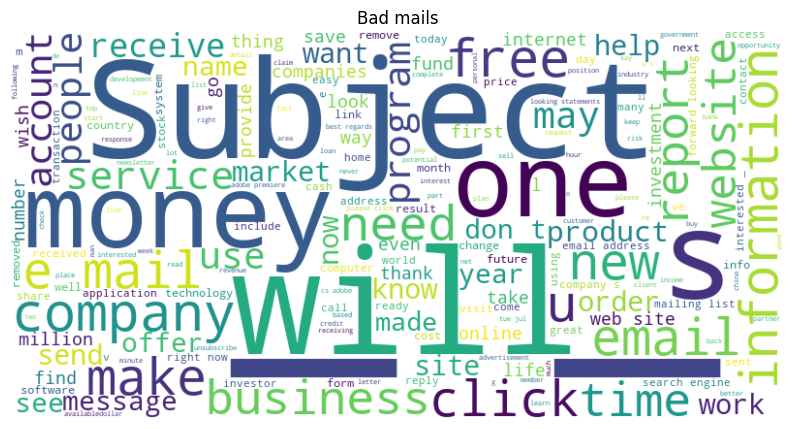

In [13]:
plot_word_cloud(fake_text,"Bad mails")
plt.show()

**Text Preprocessing**

In [14]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords

In [16]:
text_column="text"
label_column="spam"

In [17]:
stopword=set(stopwords.words("english"))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [18]:
#stopwords.fileids()

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def preprocess_text(text):
    remove_punc=[char for char in text if char not in string.punctuation]
    clean_words=''.join(remove_punc)
    text=([word for word in clean_words.split() if word.lower() not in stopword])
    return text

In [21]:
data[text_column]=data[text_column].apply(preprocess_text)

In [22]:
data[text_column]

0       [Subject, naturally, irresistible, corporate, ...
1       [Subject, stock, trading, gunslinger, fanny, m...
2       [Subject, unbelievable, new, homes, made, easy...
3       [Subject, 4, color, printing, special, request...
4       [Subject, money, get, software, cds, software,...
                              ...                        
5723    [Subject, research, development, charges, gpg,...
5724    [Subject, receipts, visit, jim, thanks, invita...
5725    [Subject, enron, case, study, update, wow, day...
5726    [Subject, interest, david, please, call, shirl...
5727    [Subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5728, dtype: object

In [23]:
data.head()

,text,spam
0,"[Subject, naturally, irresistible, corporate, ...",1
1,"[Subject, stock, trading, gunslinger, fanny, m...",1
2,"[Subject, unbelievable, new, homes, made, easy...",1
3,"[Subject, 4, color, printing, special, request...",1
4,"[Subject, money, get, software, cds, software,...",1


**Lemmatization**

In [24]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
from nltk.stem import WordNetLemmatizer

In [26]:
lmt=WordNetLemmatizer()
def lematize_text(text):
    lematize_text=' '.join([lmt.lemmatize(word) for word in text])
    return lematize_text
data[text_column]=data[text_column].apply(lematize_text)

In [27]:
data[text_column]

0       Subject naturally irresistible corporate ident...
1       Subject stock trading gunslinger fanny merrill...
2       Subject unbelievable new home made easy im wan...
3       Subject 4 color printing special request addit...
4       Subject money get software cd software compati...
                              ...                        
5723    Subject research development charge gpg forwar...
5724    Subject receipt visit jim thanks invitation vi...
5725    Subject enron case study update wow day super ...
5726    Subject interest david please call shirley cre...
5727    Subject news aurora 5 2 update aurora version ...
Name: text, Length: 5728, dtype: object

**TF-IDF Vectorize**

In [28]:
vectorizer=TfidfVectorizer()

In [29]:
x=vectorizer.fit_transform(data[text_column])
y=data[label_column]

In [30]:
#pd.DataFrame(x)

**Train Text Split**

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
x_train.shape

(4582, 34579)

**Evaluate Naive Bayes Models**

In [33]:
mnb=MultinomialNB()

In [34]:
mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)
print("Train Score: ",mnb.score(x_train,y_train))
print("Classification Report: ",classification_report(y_test,y_pred_mnb))
print("Accuracy Score: ",accuracy_score(y_test,y_pred_mnb))

Train Score:  0.9271060672195548
Classification Report:                precision    recall  f1-score   support

           0       0.87      1.00      0.93       856
           1       1.00      0.54      0.71       290

    accuracy                           0.88      1146
   macro avg       0.93      0.77      0.82      1146
weighted avg       0.90      0.88      0.87      1146

Accuracy Score:  0.8848167539267016


In [35]:
def clf_plot(y_pred, y_test):   
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5), facecolor='silver')    
# Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='', cmap="viridis", ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25,color="r") 
    sns.heatmap(cr, cmap="viridis", annot=True, linecolor='black', linewidths=0.5, ax=ax[1])
    ax[1].set_title('Classification Report', fontsize=25,color="r")    
    plt.show()

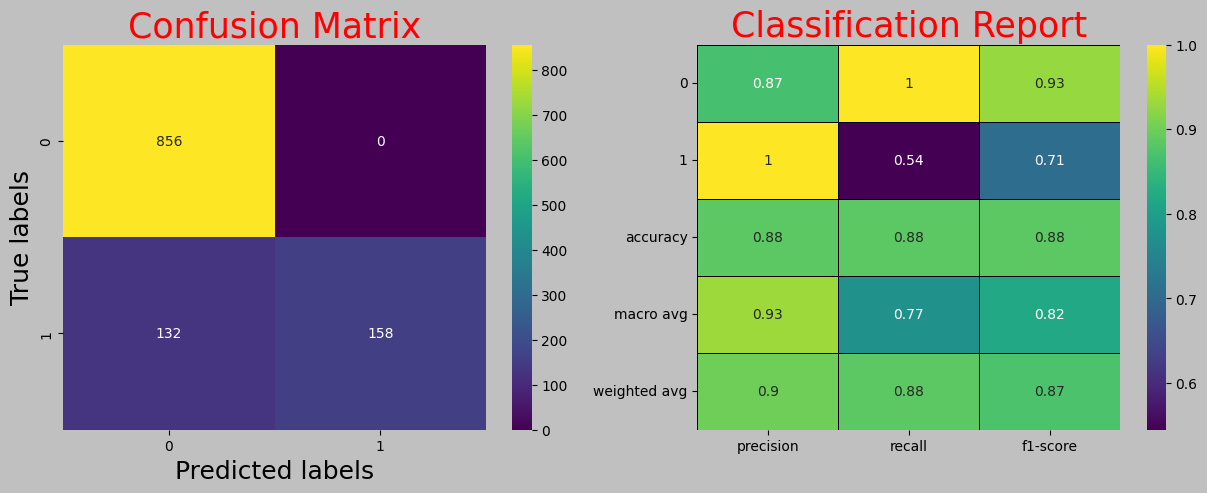

In [36]:
clf_plot(y_pred_mnb, y_test)

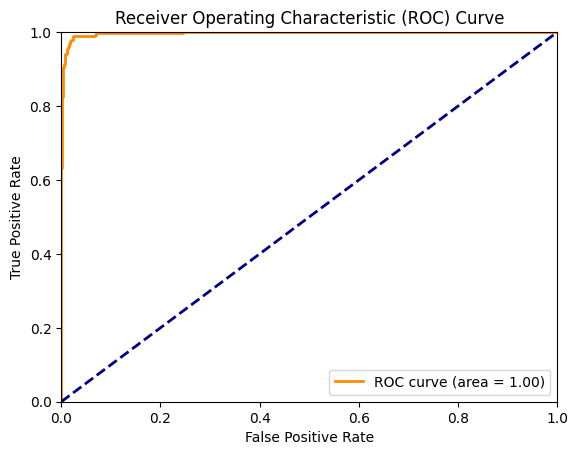

In [37]:
y_probs = mnb.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Multinomial Naive Bayes')

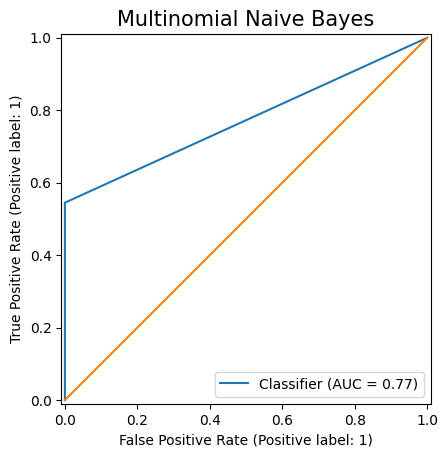

In [38]:
RocCurveDisplay.from_predictions(y_test,mnb.predict(x_test))
plt.plot([0,1],[0,1])
plt.title("Multinomial Naive Bayes",size=15)

In [39]:
bnb=BernoulliNB()

In [40]:
bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)
print("Train Score: ",bnb.score(x_train,y_train))
print("Classification Report: ",classification_report(y_test,y_pred_bnb))
print("Accuracy Score: ",accuracy_score(y_test,y_pred_bnb))

Train Score:  0.9912701876909646
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.99      0.99       856
           1       0.98      0.93      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.96      0.97      1146
weighted avg       0.98      0.98      0.98      1146

Accuracy Score:  0.9781849912739965


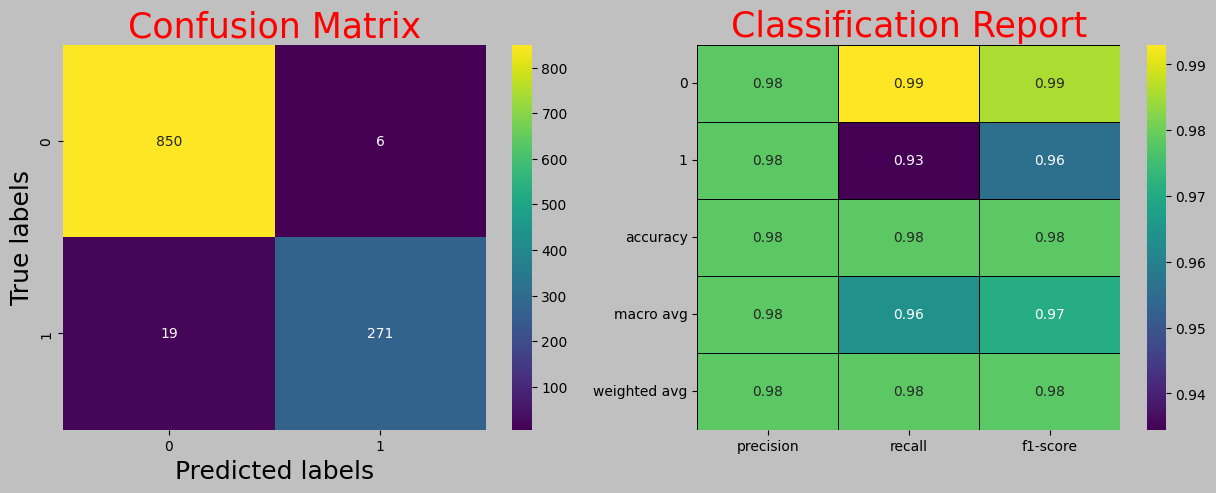

In [41]:
clf_plot(y_pred_bnb, y_test)

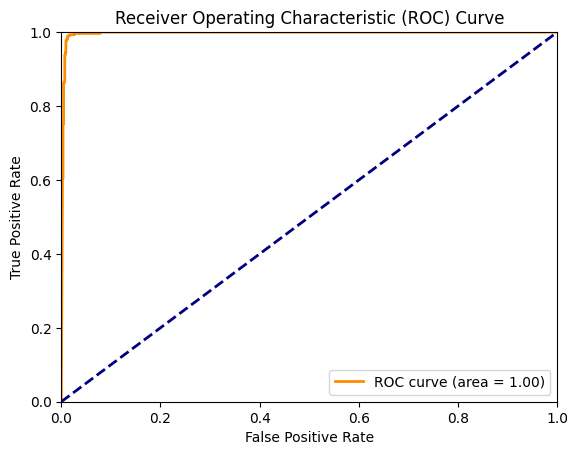

In [42]:
y_probs = bnb.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Bernoulli Naive Bayes')

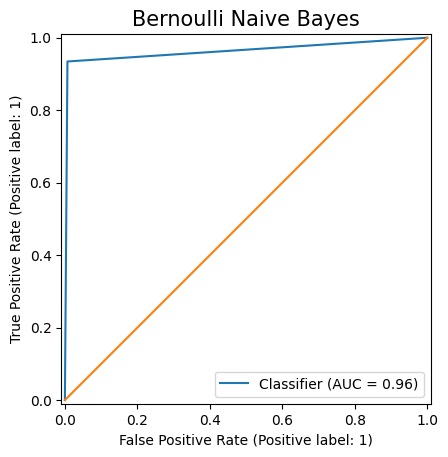

In [43]:
RocCurveDisplay.from_predictions(y_test,bnb.predict(x_test))
plt.plot([0,1],[0,1])
plt.title("Bernoulli Naive Bayes",size=15)

In [68]:
models=[mnb,bnb]

In [69]:
random_text=input()
preprocessed_text=preprocess_text(random_text)
lematized_text=lematize_text(preprocessed_text)
text_vector=vectorizer.transform([lematized_text])

 "Dear valued customer, congratulations! You've been pre-approved for an exclusive offer from our premium partners. Act now to receive up to 50% off on luxury products, only available to select customers. Click the link below to claim your reward and unlock these limited-time deals. Don’t miss out on this one-time opportunity to enhance your lifestyle with top-quality items. Hurry, this offer expires soon, and you won’t want to miss these incredible savings. Confirm your eligibility by entering your details now and start enjoying the benefits today!"


In [70]:
lematized_text

'Dear valued customer congratulation Youve preapproved exclusive offer premium partner Act receive 50 luxury product available select customer Click link claim reward unlock limitedtime deal Don’t miss onetime opportunity enhance lifestyle topquality item Hurry offer expires soon won’t want miss incredible saving Confirm eligibility entering detail start enjoying benefit today'

In [71]:
text_vector

<1x34579 sparse matrix of type '<class 'numpy.float64'>'
	with 41 stored elements in Compressed Sparse Row format>

In [76]:
for model in models:
    prediction=model.predict(text_vector)
    if prediction == 0:
        classification = "ham"
    else:
        classification = "spam"
    print(f"Model: {type(model).__name__}")
    print(f"Prediction: {prediction} ({classification})")
    print("\n")

Model: MultinomialNB
Prediction: [0] (ham)


Model: BernoulliNB
Prediction: [1] (spam)


